# <span style="color:blue"> Esercitazione 01 </span>

#### NOTA PER IL LETTORE:
La struttura che ho scelto di dare a questo documento e di tutti gli altri è la seguente. </p>
Il documento è diviso in più sezioni, ciascuna tipicamente dedicata a un esercizio. Ogni sezione consta di tre sottosezioni: </p>
- una breve sintesi dello scopo e degli obiettivi dell'esercizio ;
- la descrizione del codice implementato ;
- la graficazione dei risultati ottenuti con relativa analisi dati.

## <span style="color:blue"> Esercizio 1.1 & 1.2  
(code rmedio.cpp)


### Scopo dell'esercizio

La richiesta della prima e seconda parte dell'esercizio 1 è quella di utilizzare un metodo a blocchi per calcolare una stima di $\langle r \rangle$ e var($r$), dove $r$ è una variabile casuale con distribuzione uniforme in $[0,1]$. Viene richiesto un grafico delle suddette stime in funzione del numero di blocchi.  

### Descrizione del codice
La scrittura del programma è stata svolta con l'intento di seguire il più possibile un metodo *divide and conquer*. Si è cercato di raggruppare il numero di operazioni richieste in più functions, limitando l'uso del main alla sola chiamata di queste. </p>
Sono stati generati $M=10^5$ numeri casuali $r$ uniformi in $[0,1]$ per ottenere diverse realizzazioni di $r$ e $(r-1/2)^2$ . Dopo di che, si è raggruppato il set dei dati generati in $N=100$ blocchi e, per ciascun blocco, è stata calcolata una stima di $\langle r \rangle$, $\langle r^2 \rangle$, $\langle(r-1/2)^2\rangle$ e $\langle ( (r-1/2)^2 )^2 \rangle$ (mediante una semplice media aritmetica). Quest'ultimo rappresenta il campione statistico sul quale lavorare per ottenere la stima finale. Infine, si è calcolata la media aritmetica di tali stime $S_i = \frac{1}{i} \sum_{j=1}^{i} X_j$ (dove $X_j$ è la stima ottenuta nel blocco $j$ ) in funzione del numero di blocchi $i=1, ... , N$, accompagnata dall'opportuno errore statistico.

### Analisi dati

Sono qui riportate le istruzioni Python per la generazione dei grafici finali.

Stima finale per N=100
<r> =  0.500275531 \pm 0.00101402
var(r) =  0.08325622983333333 \pm 0.000231976


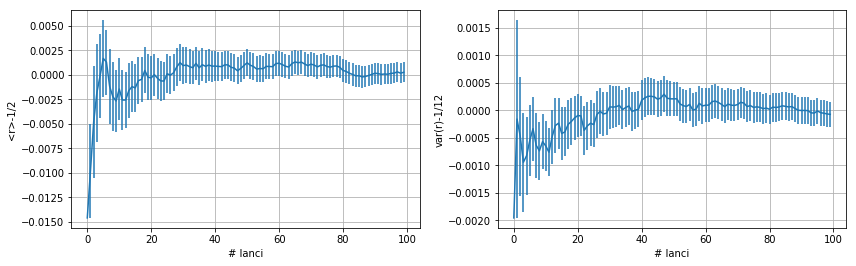

In [1]:
from numpy import *
from math import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

graph = genfromtxt('Dati.dat')

fig = plt.figure(figsize=(12, 3.8))

ax = fig.add_subplot(121)
ax.errorbar(graph[:,0],graph[:,1], yerr=graph[:,2])
ax.set_xlabel('# lanci')
ax.set_ylabel('<r>-1/2')
ax.grid(True)

ax = fig.add_subplot(122)
ax.errorbar(graph[:,0],graph[:,3], yerr=graph[:,4])
ax.set_xlabel('# lanci')
ax.set_ylabel('var(r)-1/12')
ax.grid(True)

print('Stima finale per N=100')
print('<r> = ', graph[-1,1]+0.5,'\pm',graph[-1,2])
print('var(r) = ', graph[-1,3]+ 1./12,'\pm',graph[-1,4])

plt.tight_layout()
plt.show()

In figura sono riportati i valori medi ottenuti meno il valore atteso. La compatibilità con 0 entro una deviazione standard di entrambe le stime è verificata. Inoltre sono stati riportati i risultati finali delle stime ottenute, per avere un'idea degli ordini di grandezza in gioco. Si osservano errori relativi $\epsilon \sim 10^{-3}$. Da notare che sono sufficienti poche decine di lanci per ottenere una stima compatibile con il valore atteso, il che testimonia anche l'elevata efficienza della procedura utilizzata.

## <span style="color:blue"> Esercizio 1.3
(code chi2.cpp)

### Scopo dell'esercizio

Nella terza parte dell'esercizio 1 è richiesto di svolgere un test di $\chi^2$ per verificare che il generatore di numeri pseudocasuali utilizzato in precedenza generi numeri effettivamente distribuiti in modo uniforme.

### Descrizione del codice
Si è implementato un programma che produca un totale di $100$ stime di $\chi^2$. La procedura seguita è stata la seguente. </p>
Sono stati generati un totale di $10^6$ numeri casuali, raggruppati in $100$ insiemi distinti. Ciascuno di questi insiemi contiene $n=10^4$ elementi. </p>
Si è diviso l'intervallo $[0,1]$ in $M=100$ sottointervalli e, **per ogni insieme**, si è andato a calcolare il numero di elementi $n_i$ contenuti nel sottointervallo $i$ ($i=1, ... , M$). Essendo la statistica di questo processo essenzialmente di tipo Poissoniano (se $n \gg 1$ e $p \ll 1$), sia il valore atteso sia la varianza del numero di conteggi nell'intervallo $i$ risultano pari a $np=n/M$, dove $p=1/M$ è la probabilità che il numero generato appartenga a un dato sottointervallo. Si è, pertanto, calcolato 
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M} ,$$
ottenendo una stima del $\chi^2$. Come detto, l'operazione è stata ripetuta identicamente per ciascuno dei $100$ raggruppamenti, in modo da avere a disposizione 100 stime differenti della suddetta quantità.

### Analisi dati

Poichè è aspettabile che $\chi^2 \simeq 100$ sono stati graficati i risultati ottenuti dalle simulazioni meno tale valore. 

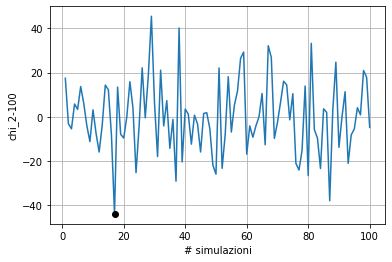

In [1]:
%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt

graph = genfromtxt('chiquadro.dat')

plt.figure()
plt.plot(graph[:,0],graph[:,1])
plt.xlabel('# simulazioni')
plt.ylabel('chi_2-100')
plt.plot(graph[16,0],graph[16,1], 'ko')

plt.grid(True)
plt.show()

I valori ottenuti oscillano intorno a 0, come aspettato, ma con deviazioni anche significative. Tra i dati generati, la deviazione maggiore dal risultato atteso è risultata essere pari a poco più del 40% (simulazione 16, in nero nel grafico) . La fluttuazione dei dati intorno a 0 fa capire, *a livello molto intuitivo*, che l'ipotesi nulla del test d'ipotesi (ovvero la distribuzione uniforme dei dati) è una supposizione ragionevole. Tuttavia, in assenza di una stima per l'incertezza dei risultati ottenuti risulta difficile trarre *quantitativamente* una conclusione esatta e indicare precisamente la probabilità con cui l'ipotesi nulla possa essere rigettata.

## <span style="color:blue"> Esercizio 2 
(code Istogrammi.cpp)


### Scopo dell'esercizio

In questo esercizio è richiesto di generare numeri casuali distribuiti secondo una data distribuzione utilizzando il metodo della trasformata. Le distribuzioni in esame sono:
- una distribuzione lorentziana $p(x)=\frac{1}{\pi}\frac{1}{x^2+1}$, con $x\in [-\infty;+\infty]$,
- una distribuzione esponenziale $p(x) = e^{-x}$, con $x\in [0;+\infty]$. <p>
    
Inoltre, viene chiesto di produrre, per ciascuna delle tre distribuzioni (uniforme, lorentziana ed esponenziale), $M=10^4$ realizzazioni di $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (per $N=1, 2, 10, 100$) e di istogrammarle.

### Descrizione del codice

La struttura del programma è stata organizzata sulla base di un ciclo *for* in 3 stadi. In ognuna esecuzione del ciclo sono stati generati $M\cdot N_{max}=10^6$ numeri casuali distributi in modo uniforme nella prima esecuzione, lorentziano nella seconda ed esponenziale nella terza. Ciò è stato implementato con un'unica function *randomgenerator*, la quale a seconda del numero di esecuzioni del ciclo produce dati distribuiti in modo opportuno. Questi dati sono stati divisi in $M$ blocchi. Per ciascun blocco (contenente 100 numeri) è stata calcolata la media cumulata mediando i primi 1, 2, 10 e 100 dati. </p>

### Analisi dati

Sono stati generati gli istogrammi dei dati raccolti nelle tre differenti simulazioni.

Mu stimato =  0.4999275433     Mu CLT =  0.5
Sigma stimato =  0.02888688776998528     Sigma CLT =  0.02886751345948129


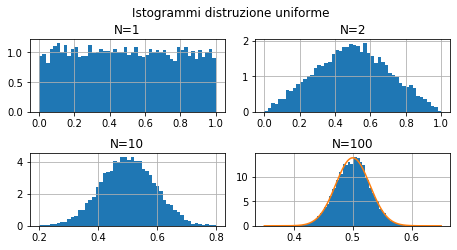

In [3]:
%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 

graph = genfromtxt('Distribuzione0.dat')

n_bins = 50

fig = plt.figure(figsize=(12, 3.8))
fig.set_size_inches(6.5, 3.5)
fig.suptitle('Istogrammi distruzione uniforme')

ax = fig.add_subplot(221)
ax.set_title('N=1')
n, bins, patches = ax.hist(graph[:,0], n_bins, density=True, range=(0,1))
ax.grid(True)

ax = fig.add_subplot(222)
ax.set_title('N=2')
n, bins, patches = ax.hist(graph[:,1], n_bins, density=True, range=(0,1))
ax.grid(True)

ax = fig.add_subplot(223)
ax.set_title('N=10')
n, bins, patches = ax.hist(graph[:,2], n_bins, density=True, range=(0.2,0.8))
ax.grid(True)

ax = fig.add_subplot(224)
ax.set_title('N=100')
n, bins, patches = ax.hist(graph[:,3], n_bins, density=True, range=(0.4,0.6))
ax.grid(True)

#----FIT DELL'ISTOGRAMMA----#

xt = plt.xticks()[0]    #Trovo le x_min e x_max dei nostri dati e genero punti x in questo intervallo
xmin, xmax = min(xt), max(xt)  
lnspc = linspace(xmin, xmax, len(graph[:,3]))

#Utilizzo una funzione di fit gaussiana
m, s = stats.norm.fit(graph[:,3])    #Stimo media e deviazione standard a partire dai dati  
pdf_g = stats.norm.pdf(lnspc, m, s)  #Calcolo il valore della gaussiana sui punti x generati 
ax.plot(lnspc, pdf_g, label="Norm")  #La plotto

print('Mu stimato = ', m , '    Mu CLT = ' , 0.5 ) #Mostro le stime dei parametri
print('Sigma stimato = ', s, '    Sigma CLT = ' , sqrt(1/1200))
#---------------------------#

plt.tight_layout()
fig.subplots_adjust(top=0.85)
plt.show()

Mu stimato =  0.0068731660182131775     Mu =  0
Gamma stimato =  1.0089467391638678     Gamma =  1


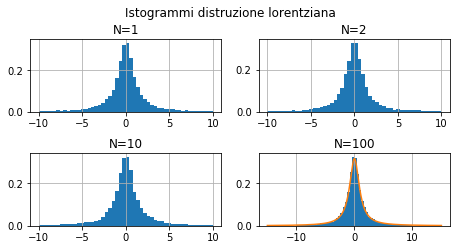

In [5]:
%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 

graph = genfromtxt('Distribuzione1.dat')

n_bins = 50

fig = plt.figure(figsize=(12, 3.8))
fig.set_size_inches(6.5, 3.5)
fig.suptitle('Istogrammi distruzione lorentziana')

ax = fig.add_subplot(221)
ax.set_title('N=1')
n, bins, patches = ax.hist(graph[:,0], n_bins, density=True, range=(-10,10))
ax.grid(True)

ax = fig.add_subplot(222)
ax.set_title('N=2')
n, bins, patches = ax.hist(graph[:,1], n_bins, density=True, range=(-10,10))
ax.grid(True)

ax = fig.add_subplot(223)
ax.set_title('N=10')
n, bins, patches = ax.hist(graph[:,2], n_bins, density=True, range=(-10,10))
ax.grid(True)

ax = fig.add_subplot(224)
ax.set_title('N=100')
n, bins, patches = ax.hist(graph[:,3], n_bins, density=True, range=(-10,10))
ax.grid(True)

#----FIT DELL'ISTOGRAMMA----#

xt = plt.xticks()[0]    #Trovo le x_min e x_max dei nostri dati e genero punti x in questo intervallo
xmin, xmax = min(xt), max(xt)  
lnspc = linspace(xmin, xmax, len(graph[:,3]))

#Utilizzo una funzione di fit lorentziana
m, gamma = stats.cauchy.fit(graph[:,3])    #Stimo media e deviazione standard a partire dai dati  
pdf_g = stats.cauchy.pdf(lnspc, m, gamma)  #Calcolo il valore della gaussiana sui punti x generati 
ax.plot(lnspc, pdf_g, label="Norm")  #La plotto

print('Mu stimato = ', m , '    Mu = ' , 0)          #Mostro le stime dei parametri
print('Gamma stimato = ', gamma, '    Gamma = ' , 1)
#---------------------------#

plt.tight_layout()
fig.subplots_adjust(top=0.85)
plt.show()

Mu stimato =  1.0003957947     Mu CLT =  1
Sigma stimato =  0.10060348736784104     Mu CLT =  0.1


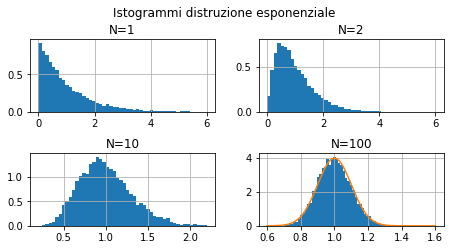

In [6]:
%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 

graph = genfromtxt('Distribuzione2.dat')

n_bins = 50

fig = plt.figure(figsize=(12, 3.8))
fig.set_size_inches(6.5, 3.5)
fig.suptitle('Istogrammi distruzione esponenziale')

ax = fig.add_subplot(221)
ax.set_title('N=1')
n, bins, patches = ax.hist(graph[:,0], n_bins, density=True, range=(0,6))
ax.grid(True)

ax = fig.add_subplot(222)
ax.set_title('N=2')
n, bins, patches = ax.hist(graph[:,1], n_bins, density=True, range=(0,6))
ax.grid(True)

ax = fig.add_subplot(223)
ax.set_title('N=10')
n, bins, patches = ax.hist(graph[:,2], n_bins, density=True, range=(0.2,2.2))
ax.grid(True)

ax = fig.add_subplot(224)
ax.set_title('N=100')
n, bins, patches = ax.hist(graph[:,3], n_bins, density=True, range=(0.7,1.4))
ax.grid(True)

#----FIT DELL'ISTOGRAMMA----#

xt = plt.xticks()[0]    #Trovo le x_min e x_max dei nostri dati e genero punti x in questo intervallo
xmin, xmax = min(xt), max(xt)  
lnspc = linspace(xmin, xmax, len(graph[:,3]))

#Utilizzo una funzione di fit gaussiana
m, s = stats.norm.fit(graph[:,3])    #Stimo media e deviazione standard a partire dai dati  
pdf_g = stats.norm.pdf(lnspc, m, s)  #Calcolo il valore della gaussiana sui punti x generati 
ax.plot(lnspc, pdf_g, label="Norm")  #La plotto

print('Mu stimato = ', m , '    Mu CLT = ' , 1 ) #Mostro le stime dei parametri
print('Sigma stimato = ', s, '    Mu CLT = ' , 1./10)
#---------------------------#

plt.tight_layout()
fig.subplots_adjust(top=0.85)
plt.show()

Le immagini generate sono di grande significato. Si osservi prima di tutto il primo istogramma per ciascuna distribuzione. Dato che $S_N|_{N=1}=x_1$, questo corrisponde alla distribuzione dei dati stessi generati e infatti, i dati rispecchiano bene un andamento rispettivamente piatto, lorentziano ed esponenziale decrescente. All'aumentare di N, poi, le somme cumulate tendono a distribuirsi in modo diverso. <p>
Le somme ottenute dalla distribuzione uniforme ed esponenziale tendono sempre più ad assumere una forma gaussiana, come 
confermato dal fit sull'ultimo istogramma. Non solo, ma anche i valori stimati dei parametri della gaussiana confermano quanto previsto dal CLT, ovvero $\langle S_N \rangle= \mu$ e var($S_N$)$= \sigma^2 / N$. <p>
D'altro canto, nel caso lorentziano la distribuzione rimane la stessa dei dati iniziali, centrata in zero con la stessa larghezza a mezza altezza (pari a 1). Ciò non solo dimostra che tale distribuzione non rispetta il CLT (essendo essa stessa un attrattore nello spazio delle densità di probabilità), ma evidenzia un'altra proprietà della lorentziana: <p>
<span style="color:red"> se $x_1, x_2, ..., x_n$ sono variabili casuali statisticamente indipendenti e identicamente distribuite (SIID) secondo una distribuzione di Cauchy di parametri ($\mu, \Gamma$ ), allora anche la loro media seguirà una distribuzione lorentziana con gli stessi parametri.

## <span style="color:blue"> Esercizio 3 
(code Buffon.cpp)

### Scopo dell'esercizio

Questo esercizio implementa l'esperimento di Buffon per la stima di $\pi$.

### Descrizione del codice

La struttura del programma è sostanzialmente analoga a quella del primo esercizio. Si è implementato un metodo a blocchi con $M=10^5$ simulazioni e $N=100$ blocchi. Si è diviso l'intervallo $[0,1]$ in 30 sottointervalli, ovvero $d=\frac{1}{30}$, e si è considerata una sbarretta lunga $l=\frac{1}{40}$. <p>
L'idea per simulare il lancio della sbarretta è la seguente, espressa anche in figura.
Si è generato un numero casuale $y \in [0,1]$ che rappresenta l'ordinata di uno dei due estremi della sbarretta. In secondo luogo si è prodotto un angolo $\theta \in [0,\pi]$ (utilizzando un metodo **accept reject** che non coinvolge l'uso di $\pi$ stesso). Questo angolo rappresenta l'inclinazione della sbarretta rispetto alla verticale. <p>

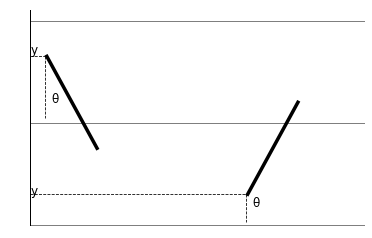

In [7]:
%matplotlib inline
from numpy import *
import matplotlib
import matplotlib.pyplot as plt

plt.figure()
frame = plt.gca()
frame.axes.get_xaxis().set_ticks([])
plt.xlim(0, 10)    
plt.ylim(-0.01, 0.7)
plt.axis('off')
yaxis_x=([0,0])
yaxis_y=([0,0.7])
plt.plot(yaxis_x,yaxis_y,'k',linewidth=1)

H=array([0,10])
H_y=zeros(2)
for i in range(3):
    H_y=[i/3 , i/3]
    plt.plot(H,H_y, 'k-',linewidth=0.5)

sbarra1_x=array([0.5, 2])
sbarra1_y=array([0.55,0.25])
sbarra2_x=array([6.5, 8])
sbarra2_y=array([0.1,0.4])
plt.plot(sbarra1_x, sbarra1_y, 'k-', linewidth=3.5)
plt.plot(sbarra2_x, sbarra2_y, 'k-', linewidth=3.5)

vert1_x=array([0.45,0.45])
vert1_y=array([0.55,0.35])
oriz1_x=array([0,0.45])
oriz1_y=array([0.55,0.55])
plt.plot(vert1_x,vert1_y, 'k--', linewidth=0.8)
plt.text(0.65, 0.4, 'θ', color='black', fontsize=12)
plt.plot(oriz1_x,oriz1_y, 'k--', linewidth=0.8)
plt.text(0.02, 0.56, 'y', color='black', fontsize=12)

vert2_x=array([6.45,6.45])
vert2_y=array([0.1,0.01])
oriz2_x=array([0,6.45])
oriz2_y=array([0.1,0.1])
plt.plot(vert2_x,vert2_y, 'k--', linewidth=0.8)
plt.text(6.65, 0.06, 'θ', color='black', fontsize=12)
plt.plot(oriz2_x,oriz2_y, 'k--', linewidth=0.8)
plt.text(0.02, 0.1, 'y', color='black', fontsize=12)

plt.show()

A questo punto vi sono due possibilità:
- se $\cos \theta \geq 0$ allora la sbarretta ha intersecato una generica linea orizzontale $s$ (di ordinata $s/d$, $s=1, ..., 30$) se $y\geq s/d$ e $y-l \cos \theta < s/d $ (sbarretta a sinistra in figura); <p>
- se $\cos \theta<0$ allora la sbarretta ha intersecato la linea orizzontale $s$ se $y<s/d$ e $y-l \cos \theta \geq s/d $, perchè in questo caso l'angolo di inclinazione è maggiore di $\pi/2$ (sbarretta a destra in figura). <p>
    
Dunque, per ogni simulazione sono state generate queste due coordinate e raggruppate negli $N$ blocchi. In ogni blocco si è contato il numero di volte che le condizioni qui sopra sono state soddisfatte (cioè vi è stata una intersezione). <p>
Per ogni blocco, quindi, è stata ottenuta una stima di $\pi$ con la formula di Buffon e, utilizzando il metodo precedentemente usato per l'esercizio 1, si è graficato l'andamento della somma cumulata di tali stime al variare di $N$.

### Analisi dati

Stima finale per N=100
pi =  3.141199018589793 \pm 0.010102


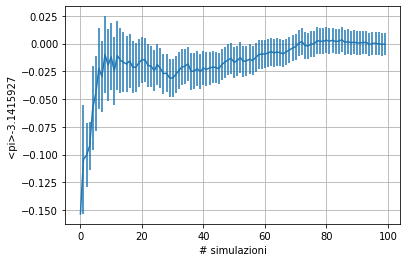

In [4]:
%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt

graph = genfromtxt('Pigreco.dat')

plt.figure()
plt.errorbar(graph[:,0],graph[:,1], yerr=graph[:,2])
plt.xlabel('# simulazioni')
plt.ylabel('<pi>-3.1415927')

print('Stima finale per N=100')
print('pi = ', graph[-1,1]+pi,'\pm',graph[-1,2])

plt.grid(True)
plt.show()

Il risultato ottenuto è una stima compatibile con il valore vero entro una deviazione standard. Inoltre si osservi che sono sufficienti circa 60 simulazioni (ovvero blocchi) per ottenere un valore compatibile entro un $\sigma$. L'errore relativo sulla stima finale è $\epsilon \sim 10^{-2}$, quindi ancora una volta si ottiene una stima accurata.